In [1]:
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install matplotlib
# !pip install xgboost
# !pip install lightgbm
# !pip install sklearn

# 라이브러리 임포트
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, RidgeCV, RidgeClassifier
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# EDA

## 변수 설명
  - **int_rate** : 대출자에 부여된 이자율 (Interest rate of the loan the applicant received)
  - **annual_inc** : 연 소득 (annual income)
  - **dti** : 소득 대비 부채 비율 (Debt-to-income ratio)
  - **delinq_2yrs** : 지난 2년 간 체납 발생 횟수 (Delinquencies on lines of credit in the last 2 years)
  - **inq_last_6mths** : 지난 6개월 간 신용 조회 수 (Inquiries into the applicant's credit during the last 6 months)
  - **pub_rec** : 파산 횟수 (Number of bankruptcies listed in the public record)
  - **revol_bal** : 리볼빙 잔액 (Total credit revolving balance)
  - **total_acc** : 지금까지 소유했던 신용카드 개수 (num_total_cc_accounts : Total number of credit card accounts in the applicant's history)
  - **collections_12_mths_ex_med** : 의료부문을 제외한 지난 12개월 간 추심 발생 횟수 (num_collections_last_12m : Number of collections in the last 12 months. This excludes medical collections)
  - **acc_now_delinq** : 대출자가 체납 상태에 있지 않은 계좌의 수 (The number of accounts on which the borrower is now delinquent)
  - **tot_coll_amt** : 대출자에 대한 현재까지의 총 추심액 (total_collection_amount_ever : The total amount that the applicant has had against them in collections)
  - **tot_cur_bal** : 전 계좌의 현재 통합 잔고 (Total current balance of all accounts)
  - **chargeoff_within_12_mths** : 대출 부 신청인의 대출 신청 직전 12개월 간 세금 공제 횟수 (Number of charge-offs within last 12 months at time of application for the secondary applicant)
  - **delinq_amnt** : 체납 금액 (delinquency amount)
  - **tax_liens** : 세금 저당권의 수 (Number of tax liens)
  - **emp_length1 ~ 12** : 고용 연수 (Number of years in the job)
  - **home_ownership1 ~ 6** : 대출 신청자의 주거 소유 형태 (The ownership status of the applicant's residence)
  - **verification_status1 ~ 3** : 공동 소득 발생 여부 및 형태 (verification_income_joint : Type of verification of the joint income)
  - **purpose1 ~ 14** : 대출 목적 (The purpose of the loan)
  - **initial_list_status1 ~ 2** : 최초 대출 상태 (Initial listing status of the loan)
  - **mths_since_last_delinq1 ~ 11** : 마지막 체납이 지금으로부터 몇개월 전에 있었는지를 나타내는 변수 (Months since the last delinquency)
  
  - **funded_amnt** : 대출액 (Funded amount)
  - **funded_amnt_inv** : 사채 대출액 (Funded amount by investors)
  - **total_rec_late_fee** : 총 연체료 중 납부액 (Late fees received to date)
  - **term1** : 상환 기간 (The number of payments on the loan. Values are in months and can be either 36 or 60)
  - **open_acc** : 개설 개좌 수 (The number of open credit lines in the borrower's credit file)
  - **installment** : 대출 발생 시 월 상환액 (The monthly payment owed by the borrower if the loan originates)
  - **revol_util** : 리볼빙 한도 대비 리볼빙 사용 비율 (Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit)
  - **out_prncp** : 대출액 중 원리금 잔액 (Remaining outstanding principal for total amount funded)
  - **out_prncp_inv** : 사채 대출액 중 원리금 잔액 (Remaining outstanding principal for total amount funded by investors)
  - **total_rec_int** : 이자 상환액 (Interest received to date)
  - **fico_range_low** : FICO(일종의 신용점수) 최저값 (The lower boundary range the borrower’s FICO at loan origination belongs to)
  - **fico_range_high** : FICO(일종의 신용점수) 최고값 (The upper boundary range the borrower’s FICO at loan origination belongs to)
  
  - **depvar** : 고객의 부도 여부 (dependent variable)

In [2]:
df = pd.read_csv('/content/drive/MyDrive/이어드림 실습/0126/train.csv')
df.head()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1200,1200.0,0.0,1,18,37.74,0.076,0.0,0.0,157.94,765,769,0
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,8000,8000.0,0.0,1,8,269.52,0.447,0.0,0.0,1702.42,665,669,0
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5000,5000.0,0.0,1,7,168.45,0.880,0.0,0.0,1066.64,670,674,0
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,15000,15000.0,0.0,1,12,510.27,0.457,0.0,0.0,1256.24,680,684,1
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,10000,10000.0,0.0,1,8,335.45,0.416,0.0,0.0,871.04,660,664,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   int_rate                    100000 non-null  float64
 1   annual_inc                  100000 non-null  float64
 2   dti                         100000 non-null  float64
 3   delinq_2yrs                 100000 non-null  int64  
 4   inq_last_6mths              100000 non-null  int64  
 5   pub_rec                     100000 non-null  int64  
 6   revol_bal                   100000 non-null  int64  
 7   total_acc                   100000 non-null  int64  
 8   collections_12_mths_ex_med  100000 non-null  int64  
 9   acc_now_delinq              100000 non-null  int64  
 10  tot_coll_amt                100000 non-null  int64  
 11  tot_cur_bal                 100000 non-null  int64  
 12  chargeoff_within_12_mths    100000 non-null  int64  
 13  delinq_amnt    

In [ ]:
df.describe()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.130833,7.436061e+04,18.514508,0.343700,0.668880,0.235720,16090.202820,24.675910,0.018810,0.005800,250.588120,1.305281e+05,0.009630,19.288330,0.063820,0.065400,0.326240,0.089410,0.08058,0.059480,0.060710,0.046640,0.045320,0.045690,0.038570,0.075550,0.066410,0.000330,0.466120,0.000070,0.000050,0.110880,0.422550,0.321800,0.390200,0.288000,0.009620,0.226720,0.582810,0.0,0.060400,0.004250,0.019830,0.01101,0.007310,0.058200,0.000650,0.011250,0.007070,0.000880,0.434430,0.565570,0.489320,0.052360,0.060090,0.045700,0.050750,0.048560,0.051340,0.053430,0.048960,0.050030,0.049460,13735.317750,13729.341073,2.448885e+00,0.855920,11.620700,434.077648,0.537233,0.253327,0.253259,2491.282802,692.630550,696.630660,0.325690
std,0.044773,7.467409e+04,8.413049,0.905007,0.952044,0.661468,21569.939271,11.883834,0.150321,0.083585,2042.770881,1.503326e+05,0.110079,893.304366,0.468027,0.247232,0.468839,0.285336,0.27219,0.236522,0.238799,0.210868,0.208006,0.208813,0.192569,0.264278,0.248999,0.018163,0.498853,0.008366,0.007071,0.313985,0.493968,0.467169,0.487797,0.452833,0.097609,0.418712,0.493097,0.0,0.238228,0.065054,0.139417,0.10435,0.085186,0.234122,0.025487,0.105468,0.083786,0.029652,0.495684,0.495684,0.499888,0.222753,0.237655,0.208835,0.219488,0.214947,0.220691,0.224891,0.215786,0.218008,0.216828,8464.825314,8461.694483,1.489496e+01,0.351173,5.458774,265.921746,0.239373,18.053290,18.051746,2706.262200,29.668017,29.668584,0.468634
min,0.053200,5.360000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,

In [ ]:
# 결측치 확인
pd.DataFrame(df.isnull().sum()).rename(columns={0:'Non-Null Count'}).T

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar
Non-Null Count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 라벨(depvar) 비율 확인
print('y=1 ratio :', df.depvar.sum()/len(df))

y=1 ratio : 0.32569


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()
corr['depvar']

int_rate           0.277944
annual_inc        -0.056885
dti                0.110809
delinq_2yrs        0.021292
inq_last_6mths     0.096474
                     ...   
out_prncp_inv      0.020187
total_rec_int      0.013784
fico_range_low    -0.155840
fico_range_high   -0.155840
depvar             1.000000
Name: depvar, Length: 76, dtype: float64

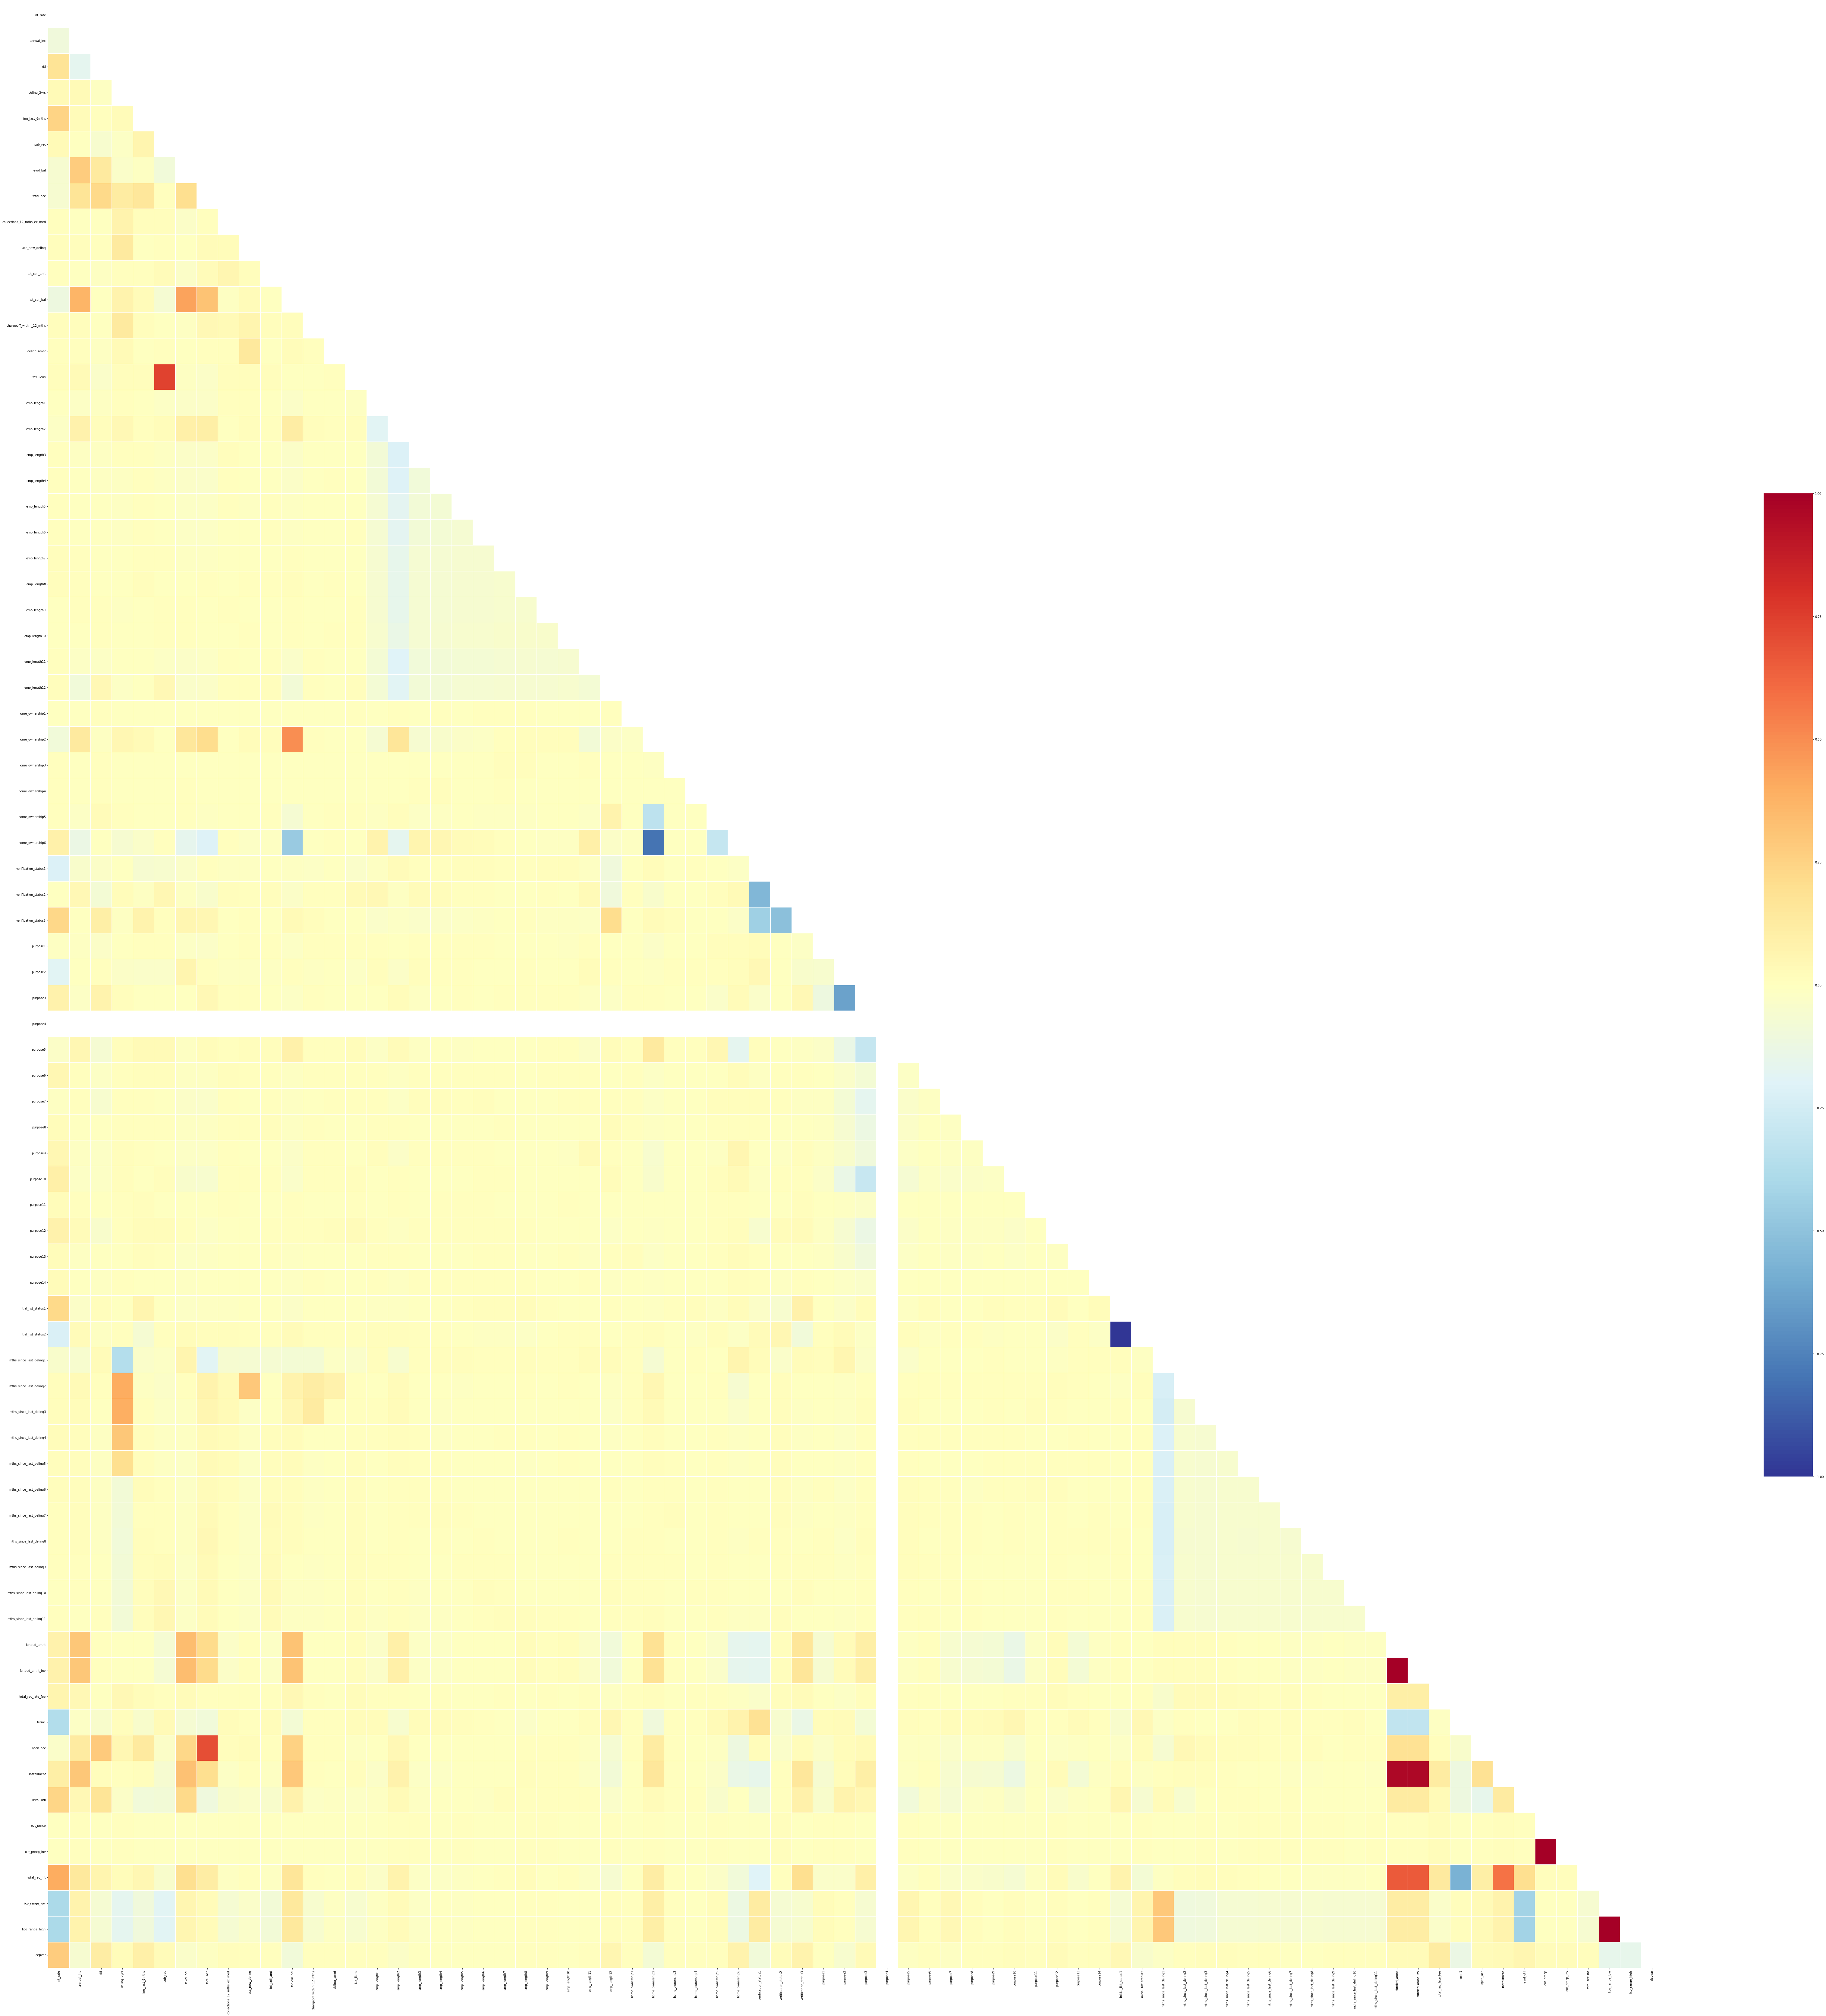

In [ ]:
fig, ax = plt.subplots( figsize=(120,120) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(corr, 
            cmap = 'RdYlBu_r', # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

### feature 삭제 이유
- describe로 봤을 때, 0과 1로 나온는 값들 중 1의 비율이 0.05이하 인 경우, 전제 갯수가  10000개 중 500개 이하라는 소리 -> y_label이 1인 갯수는 3200개 정도
> 이것만 봤을 때는 줄일 수 있는 근거가 없다.

- 하지만 상관관계를 찍어 봤을 때, 해당 수치들이 depvar랑의 상관관계가 거의 없다.  
> depvar랑 해당 값은 0과 1로 이루어진 값일 텐데, 만약 유용한 수치였다면 음이든 양이든 관계가 세게 나타 났어야 하지 않나? 라는 추론에서 삭제를 해본다. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   int_rate                    100000 non-null  float64
 1   annual_inc                  100000 non-null  float64
 2   dti                         100000 non-null  float64
 3   delinq_2yrs                 100000 non-null  int64  
 4   inq_last_6mths              100000 non-null  int64  
 5   pub_rec                     100000 non-null  int64  
 6   revol_bal                   100000 non-null  int64  
 7   total_acc                   100000 non-null  int64  
 8   collections_12_mths_ex_med  100000 non-null  int64  
 9   acc_now_delinq              100000 non-null  int64  
 10  tot_coll_amt                100000 non-null  int64  
 11  tot_cur_bal                 100000 non-null  int64  
 12  chargeoff_within_12_mths    100000 non-null  int64  
 13  delinq_amnt    

### one-hot encoding을 하나의 열로 합치기

In [4]:
from numpy.core.arrayprint import DatetimeFormat
def combine(df, col_name, num):
    col_list = [f'{col_name}{i}' for i in range(1, num+1)] 
    
    d =  []
    for i in df.index:
        for idx, col in enumerate(col_list):
            if df[col][i] == 1:
                d.append(idx)

    for col in col_list:
        df.drop(col, axis=1, inplace=True)

    df[col_name] = d

    return df

In [ ]:
df = combine(df, 'emp_length', 12)

In [ ]:
df = combine(df, 'home_ownership', 6)

In [ ]:
df = combine(df, 'verification_status', 3)

In [ ]:
df = combine(df, 'purpose', 14)

In [ ]:
df = combine(df, 'initial_list_status', 2)

In [ ]:
df = combine(df, 'mths_since_last_delinq', 11)

In [5]:
df = combine(df, 'emp_length', 12)
df = combine(df, 'home_ownership', 6)
df = combine(df, 'verification_status', 3)
df = combine(df, 'purpose', 14)
df = combine(df, 'initial_list_status', 2)
df = combine(df, 'mths_since_last_delinq', 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   int_rate                    100000 non-null  float64
 1   annual_inc                  100000 non-null  float64
 2   dti                         100000 non-null  float64
 3   delinq_2yrs                 100000 non-null  int64  
 4   inq_last_6mths              100000 non-null  int64  
 5   pub_rec                     100000 non-null  int64  
 6   revol_bal                   100000 non-null  int64  
 7   total_acc                   100000 non-null  int64  
 8   collections_12_mths_ex_med  100000 non-null  int64  
 9   acc_now_delinq              100000 non-null  int64  
 10  tot_coll_amt                100000 non-null  int64  
 11  tot_cur_bal                 100000 non-null  int64  
 12  chargeoff_within_12_mths    100000 non-null  int64  
 13  delinq_amnt    

In [ ]:
df['emp_length']

0         0
1         1
2         3
3         2
4         3
         ..
99995     6
99996    10
99997     3
99998    11
99999     4
Name: emp_length, Length: 100000, dtype: int64

# Train Valid Split

In [6]:
X = df.drop('depvar', axis=1)
y = df['depvar']

In [7]:
# data를 training set과 validation set으로 나누기
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [8]:
# training set과 validation set의 데이터 수 확인
print('training set length :', len(X_train))
print('validation set length :', len(X_valid))

training set length : 80000
validation set length : 20000


In [ ]:
# validation set의 라벨 비율 확인
y_valid.sum()/len(y_valid)

0.32445

`# Single Model(XGBoost)
## XGBClassifier의 하이퍼 파라미터 설명
- **LINK** : https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier
- **max_depth=3** : 디시전 트리의 최대 깊이
- **learning_rate=0.1** : 0과 1 사이의 값을 가지는 부스팅에 대한 학습률(eta). 매 부스팅 단계 이후 새로이 추가된 가중치는 이 파라미터로 조정된다. 이 값이 낮을수록 보수적이며, 수렴에 필요한 더 많은 디시전 트리가 필요하다.
- **n_estimators=100** : 라운드의 횟수 또는 부스팅된 디시전 트리의 개수
- **silent=True** : 부스팅의 수행 동안 메시지를 출력할지에 대한 여부
- **objective="reg:linear"** : 모델이 학습할 작업의 분류, 미리 정의된 작업은 문자열로 지정이 가능하지만, 그렇지 않은 경우 콜러블callable을 만들어서 지정할 수도 있다.
- **booster="gbtree"** : 'gbtree', 'gblinear', 'dart'일 수 있다. 'dart'는 드롭아웃(dropout)이라는 특성을 추가한다(과적합 방지를 위해 무작위로 디시전 트리를 선택해 제거(드롭)한다). 'gblinear'는 정규화된 선형 모델을 만든다(디시전 트리가 아니라 라소 회귀와 유사하다).
- **nthread=None** : 더 이상 사용되지 않는다.
- **n_jobs** : 사용할 스레드의 개수
- **gamma=0** : 노드 분할에 필요한 최소 손실 감소
- **min_child_weight=1** : 자식 노드 생성에 필요한 헤시안(hessian) 합의 최솟값
- **max_delta_step=0** : 보다 보수적으로 갱신을 수행하도록 만드는 값. 불균형 범주의 데이터셋에 대해서는 1부터 10까지의 값으로 설정한다.
- **subsample=1** : 부스팅에 사용할 샘플의 비율
- **colsample_bytree=1** : 부스팅에 사용할 특징 열의 비율
- **colsample_bylevel=1** : 각 디시전 트리의 수준별 사용할 특징 열의 비율
- **colsample_bynode=1** : 각 디시전 트리의 노드별 사용할 특징 열의 비율
- **reg_alpha=0** : L1 정규화(가중치의 평균). 이 값이 클수록 보수적이게 된다.
- **reg_lambda=1** : L2 정규화(가중치의 제곱근). 이 값이 클수록 보수적이게 된다.
- **base_score=.5** : 초기 편향치(bias)
- **seed=None** : 더 이상 사용되지 않는다.
- **random_state=0** : 난수 생성 시드
- **missing=None** : 누락된 데이터가 해석될 값. None은 np.nan을 의미한다.
- **importance_type='gain'** : 특징 중요도의 유형. 'gain', 'weight', 'cover', 'total_gain', 'total_cover'로 설정될 수 있다.

In [ ]:
# 하이퍼 파라미터 튜닝
xgb_clf = xgboost.XGBClassifier()

param_grid = {'max_depth':[3, 10],
              'learning_rate':[0.1, 0.05],
              'n_estimators':[100, 500],
              'colsample_bytree': [0.5, 0,75],
              'min_child_weight' : [1, 3]}

cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2)

grid_search = GridSearchCV(estimator=xgb_clf,
                           param_grid=param_grid, 
                           n_jobs=-1,
                           cv=cv,
                           scoring='f1', #이부분을 F1 SCORE로 바꾸어 볼 수 있다. 
                           error_score=0) 

results=grid_search.fit(X_train, y_train)

results.best_params_

KeyboardInterrupt: ignored

In [9]:
# best parameter를 사용하여 prediction 수행
xgb_clf = xgboost.XGBClassifier(max_depth = 7,
                                n_estimators =500,
                                colsample_bytree= 0.5,
                                min_child_weight = 3,
                                reg_alpha = 0.03,
                                learning_rate=0.05,
                                objective = 'binary:logistic',
                                eval_metric='mlogloss')

xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_valid)

In [ ]:
# y_valid가 0 또는 1일 확률 출력
y_pred_prob = xgb_clf.predict_proba(X_valid)


print(len(y_pred_prob))
y_pred_prob

20000


array([[0.18043482, 0.8195652 ],
       [0.09282345, 0.90717655],
       [0.7218623 , 0.2781377 ],
       ...,
       [0.92114955, 0.07885046],
       [0.65775144, 0.3422486 ],
       [0.53536737, 0.46463266]], dtype=float32)

In [ ]:
# y_valid가 1일 확률 출력
y_pred_prob[:,1]

array([0.54131407, 0.12233078, 0.24639614, ..., 0.15840751, 0.03906867,
       0.17314816], dtype=float32)

In [ ]:

# y_valid 예측값 출력
# y_pred_prob[:,1]이 0.5(threshold)보다 큰 경우 1의 예측값을 return한다

print(len(y_pred_xgb))
y_pred_xgb

20000


array([1, 0, 0, ..., 0, 0, 0])

In [ ]:

# 1로 예측된 y_valid 갯수 및 비율 출력
print(y_pred_xgb.sum())
print(y_pred_xgb.sum()/len(y_pred_xgb))

4632
0.2316


In [ ]:
# 평가 함수 정의
def get_clf_eval(y_actual, y_pred):
    accuracy = accuracy_score(y_actual, y_pred)
    precision = precision_score(y_actual, y_pred)
    recall = recall_score(y_actual, y_pred)
    AUC = roc_auc_score(y_actual, y_pred)
    F1 = f1_score(y_actual, y_pred)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('AUC: {:.4f}'.format(AUC))
    print('F1: {:.4f}'.format(F1))
    
    sns.heatmap(confusion_matrix(y_actual, y_pred), annot=True, fmt='d', cmap='YlGnBu')


정확도: 0.7534
정밀도: 0.6732
재현율: 0.4881
AUC: 0.6859
F1: 0.5659


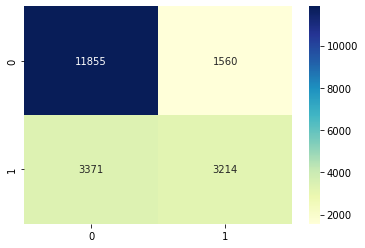

In [ ]:
# xgboost 성능 확인
get_clf_eval(y_valid, y_pred_xgb)
#재현율을 높히는 방향으로 threshold를 조정하는 것도 좋다.


정확도: 0.7513
정밀도: 0.6219
재현율: 0.6244
AUC: 0.7190
F1: 0.6232


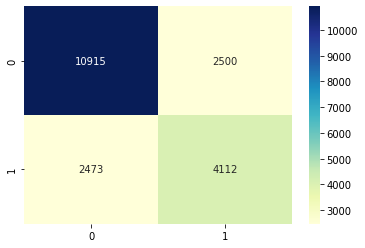

In [ ]:
# threshold 변경 및 성능 확인
get_clf_eval(y_valid, y_pred_prob[:,1]>0.4)

object를 이진으로 바꾸고 난 뒤 결과
> 확인 결과 똑같다. 


정확도: 0.7534
정밀도: 0.6732
재현율: 0.4881
AUC: 0.6859
F1: 0.5659


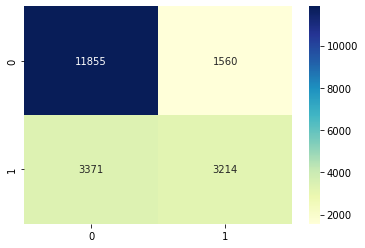

In [ ]:
get_clf_eval(y_valid, y_pred_xgb)


정확도: 0.7513
정밀도: 0.6219
재현율: 0.6244
AUC: 0.7190
F1: 0.6232


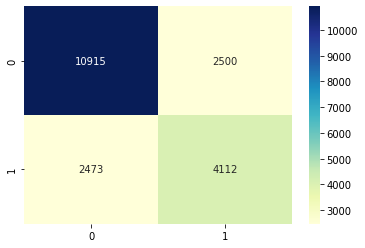

In [ ]:
get_clf_eval(y_valid, y_pred_prob[:,1]>0.4)

# Ensemble(Voting)

In [ ]:
rnd_clf = RandomForestClassifier()
lgbm_clf = LGBMClassifier(max_depth = 7,
                                n_estimators =500,
                                colsample_bytree= 0.5,
                                min_child_weight = 3,
                                reg_alpha = 0.3,
                                reg_lambda = 0.05,
                                learning_rate=0.05,
                                application = 'binary',
                                eval_metric='mlogloss')
# rid_clf = RidgeClassifier()
# dtc_clf = DecisionTreeClassifier()
# svm_clf = SVC()
# ada_clf = AdaBoostClassifier()
# gbc_clf = GradientBoostingClassifier()
# bag_clf = BaggingClassifier()
# ext_clf = ExtraTreesClassifier()
# knn_clf = KNeighborsClassifier()
# svc_clf = SVC()
#tree 기반 모델은 scaling을 할 필요 없지만 -> 다른 딥러닝이나 이런걸 사용하게 되면 min-max scaling등을 활용해야 될 수도 있다. 

voting_clf = VotingClassifier(estimators=[('rnd', rnd_clf), ('lgbm', lgbm_clf), ('xgb', xgb_clf)], voting='soft')


정확도: 0.7542
정밀도: 0.6767
재현율: 0.4656
AUC: 0.6793
F1: 0.5516


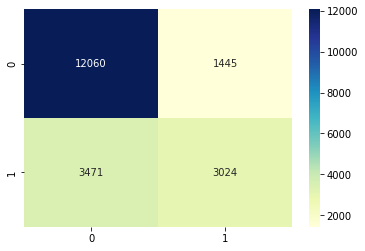

In [ ]:
for clf in (rnd_clf, lgbm_clf, xgb_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred_vote = clf.predict(X_valid)

# ensemble(voting) 성능 확인
get_clf_eval(y_valid, y_pred_vote)

# Ensemble(Stacking)

### 튜닝된 xgboost와 튜닝이 안된 random forest, lgbm을 stacking



정확도: 0.7549
정밀도: 0.6676
재현율: 0.5090
AUC: 0.6923
F1: 0.5776


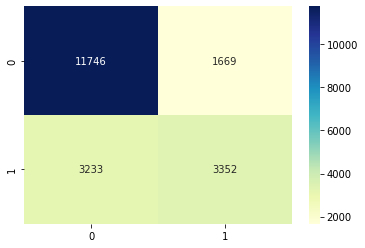

In [ ]:
stacking_clf = StackingClassifier(estimators=[('rnd', rnd_clf), ('lgbm', lgbm_clf), ('xgb', xgb_clf)], final_estimator = LGBMClassifier())
stacking_clf.fit(X_train, y_train)
y_pred_stack = stacking_clf.predict(X_valid)

# ensemble(stacking) 성능 확인
get_clf_eval(y_valid, y_pred_stack)

In [ ]:
y_prob = stacking_clf.predict_proba(X_valid)

In [ ]:
y_prob

array([[0.94509169, 0.05490831],
       [0.60311312, 0.39688688],
       [0.8737651 , 0.1262349 ],
       ...,
       [0.23401615, 0.76598385],
       [0.6192799 , 0.3807201 ],
       [0.96740097, 0.03259903]])


정확도: 0.7442
정밀도: 0.5992
재현율: 0.6740
AUC: 0.7264
F1: 0.6344


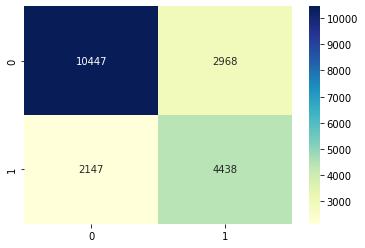

In [ ]:
get_clf_eval(y_valid, y_prob[:,1]>0.4)

### 마지막 판단을 xgboost로 변경
앞선 lgbm보다 속도가 더 걸리는 경향이 있다.
f1 score는 올랐으나, public 점수는 더 떨어진 것을 알 수 있다.


정확도: 0.7552
정밀도: 0.6624
재현율: 0.5232
AUC: 0.6961
F1: 0.5846


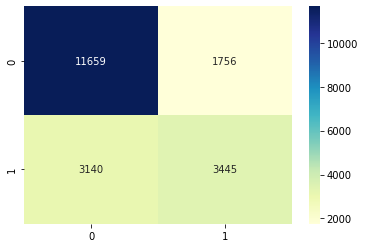

In [ ]:
stacking_clf = StackingClassifier(estimators=[('rnd', rnd_clf), ('lgbm', lgbm_clf), ('xgb', xgb_clf)], final_estimator = XGBClassifier())
stacking_clf.fit(X_train, y_train)
y_pred_stack = stacking_clf.predict(X_valid)

# ensemble(stacking) 성능 확인
get_clf_eval(y_valid, y_pred_stack)


정확도: 0.7460
정밀도: 0.6028
재현율: 0.6702
AUC: 0.7267
F1: 0.6347


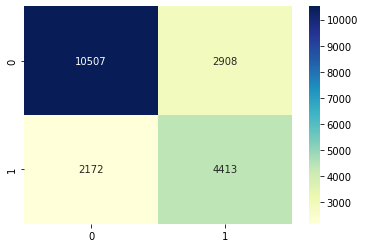

In [ ]:
y_prob = stacking_clf.predict_proba(X_valid)
get_clf_eval(y_valid, y_prob[:,1]>0.4)

### lgbm 튜닝후 


정확도: 0.7557
정밀도: 0.6645
재현율: 0.5209
AUC: 0.6959
F1: 0.5840


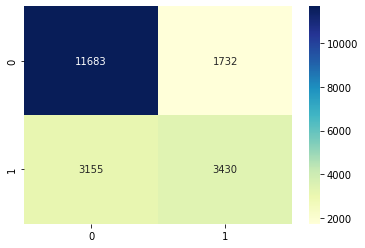

In [ ]:
stacking_clf = StackingClassifier(estimators=[('rnd', rnd_clf), ('lgbm', lgbm_clf), ('xgb', xgb_clf)], final_estimator = LGBMClassifier())
stacking_clf.fit(X_train, y_train)
y_pred_stack = stacking_clf.predict(X_valid)

# ensemble(stacking) 성능 확인
get_clf_eval(y_valid, y_pred_stack)


정확도: 0.7452
정밀도: 0.6009
재현율: 0.6737
AUC: 0.7270
F1: 0.6352


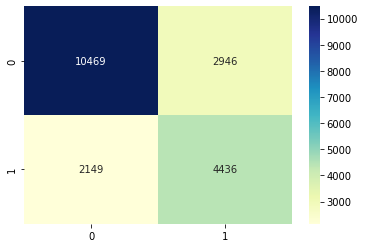

In [ ]:
y_prob = stacking_clf.predict_proba(X_valid)
get_clf_eval(y_valid, y_prob[:,1]>0.4)

# LSTM 사용


In [10]:
import torch
import torch.nn as nn


- data scaling 

In [21]:
df = pd.read_csv('/content/drive/MyDrive/이어드림 실습/0126/train.csv')
df.head()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1200,1200.0,0.0,1,18,37.74,0.076,0.0,0.0,157.94,765,769,0
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,8000,8000.0,0.0,1,8,269.52,0.447,0.0,0.0,1702.42,665,669,0
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5000,5000.0,0.0,1,7,168.45,0.880,0.0,0.0,1066.64,670,674,0
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,15000,15000.0,0.0,1,12,510.27,0.457,0.0,0.0,1256.24,680,684,1
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,10000,10000.0,0.0,1,8,335.45,0.416,0.0,0.0,871.04,660,664,1


In [ ]:
df.describe()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.130833,7.436061e+04,18.514508,0.343700,0.668880,0.235720,16090.202820,24.675910,0.018810,0.005800,250.588120,1.305281e+05,0.009630,19.288330,0.063820,0.065400,0.326240,0.089410,0.08058,0.059480,0.060710,0.046640,0.045320,0.045690,0.038570,0.075550,0.066410,0.000330,0.466120,0.000070,0.000050,0.110880,0.422550,0.321800,0.390200,0.288000,0.009620,0.226720,0.582810,0.0,0.060400,0.004250,0.019830,0.01101,0.007310,0.058200,0.000650,0.011250,0.007070,0.000880,0.434430,0.565570,0.489320,0.052360,0.060090,0.045700,0.050750,0.048560,0.051340,0.053430,0.048960,0.050030,0.049460,13735.317750,13729.341073,2.448885e+00,0.855920,11.620700,434.077648,0.537233,0.253327,0.253259,2491.282802,692.630550,696.630660,0.325690
std,0.044773,7.467409e+04,8.413049,0.905007,0.952044,0.661468,21569.939271,11.883834,0.150321,0.083585,2042.770881,1.503326e+05,0.110079,893.304366,0.468027,0.247232,0.468839,0.285336,0.27219,0.236522,0.238799,0.210868,0.208006,0.208813,0.192569,0.264278,0.248999,0.018163,0.498853,0.008366,0.007071,0.313985,0.493968,0.467169,0.487797,0.452833,0.097609,0.418712,0.493097,0.0,0.238228,0.065054,0.139417,0.10435,0.085186,0.234122,0.025487,0.105468,0.083786,0.029652,0.495684,0.495684,0.499888,0.222753,0.237655,0.208835,0.219488,0.214947,0.220691,0.224891,0.215786,0.218008,0.216828,8464.825314,8461.694483,1.489496e+01,0.351173,5.458774,265.921746,0.239373,18.053290,18.051746,2706.262200,29.668017,29.668584,0.468634
min,0.053200,5.360000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,

In [22]:
def combine(df, col_name, num):
    col_list = [f'{col_name}{i}' for i in range(1, num+1)] 
    
    d =  []
    for i in df.index:
        for idx, col in enumerate(col_list):
            if df[col][i] == 1:
                d.append(idx)

    for col in col_list:
        df.drop(col, axis=1, inplace=True)

    df[col_name] = d

    return df

In [23]:
df = combine(df, 'emp_length', 12)
df = combine(df, 'home_ownership', 6)
df = combine(df, 'verification_status', 3)
df = combine(df, 'purpose', 14)
df = combine(df, 'initial_list_status', 2)
df = combine(df, 'mths_since_last_delinq', 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   int_rate                    100000 non-null  float64
 1   annual_inc                  100000 non-null  float64
 2   dti                         100000 non-null  float64
 3   delinq_2yrs                 100000 non-null  int64  
 4   inq_last_6mths              100000 non-null  int64  
 5   pub_rec                     100000 non-null  int64  
 6   revol_bal                   100000 non-null  int64  
 7   total_acc                   100000 non-null  int64  
 8   collections_12_mths_ex_med  100000 non-null  int64  
 9   acc_now_delinq              100000 non-null  int64  
 10  tot_coll_amt                100000 non-null  int64  
 11  tot_cur_bal                 100000 non-null  int64  
 12  chargeoff_within_12_mths    100000 non-null  int64  
 13  delinq_amnt    

In [24]:
X = df.drop('depvar', axis=1)
y = df['depvar']

### data scaling



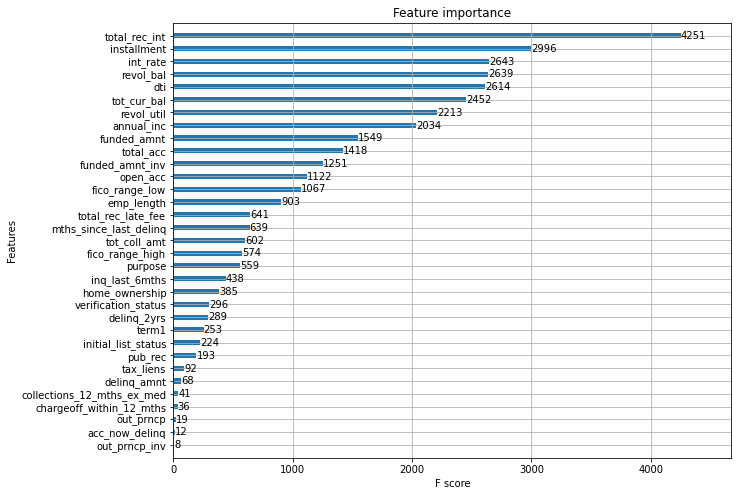

In [11]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=33, height=0.4)


In [12]:
xgb_clf.feature_importances_

array([0.08180799, 0.01763447, 0.02008134, 0.01428405, 0.02657209,
       0.01550785, 0.01494802, 0.01390188, 0.01565331, 0.01046033,
       0.01409127, 0.01572546, 0.01364523, 0.01186595, 0.01337791,
       0.0292522 , 0.0392761 , 0.19061922, 0.10770897, 0.0157933 ,
       0.02995249, 0.01389713, 0.04147774, 0.0283574 , 0.0434883 ,
       0.03095158, 0.02991006, 0.02033044, 0.02532545, 0.01695441,
       0.01438285, 0.01022016, 0.01254511], dtype=float32)

In [13]:
feature_rank = list(zip(xgb_clf.feature_importances_, X_train.columns))

In [14]:

feature_rank.sort()

In [15]:
columns = []
for idx, col in enumerate(feature_rank):
    columns.append(col[1])

In [ ]:

columns

['initial_list_status',
 'acc_now_delinq',
 'delinq_amnt',
 'mths_since_last_delinq',
 'tax_liens',
 'delinq_2yrs',
 'total_acc',
 'tot_coll_amt',
 'revol_util',
 'revol_bal',
 'open_acc',
 'purpose',
 'pub_rec',
 'tot_cur_bal',
 'chargeoff_within_12_mths',
 'collections_12_mths_ex_med',
 'annual_inc',
 'verification_status',
 'dti',
 'emp_length',
 'home_ownership',
 'inq_last_6mths',
 'out_prncp_inv',
 'funded_amnt',
 'fico_range_low',
 'installment',
 'fico_range_high',
 'funded_amnt_inv',
 'out_prncp',
 'total_rec_int',
 'int_rate',
 'term1',
 'total_rec_late_fee']

In [25]:
X = X[columns]

In [26]:
# data를 training set과 validation set으로 나누기
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [19]:
X

,initial_list_status,acc_now_delinq,delinq_amnt,mths_since_last_delinq,tax_liens,chargeoff_within_12_mths,revol_util,total_acc,tot_coll_amt,delinq_2yrs,purpose,revol_bal,pub_rec,collections_12_mths_ex_med,tot_cur_bal,open_acc,verification_status,annual_inc,dti,emp_length,home_ownership,inq_last_6mths,out_prncp_inv,funded_amnt,fico_range_high,installment,fico_range_low,funded_amnt_inv,out_prncp,total_rec_int,int_rate,term1,total_rec_late_fee
0,1,0,0,0,0,0,0.076,26,0,0,1,3016,0,0,11773,18,1,21000.0,29.19,0,5,1,0.0,1200,769,37.74,765,1200.0,0.0,157.94,0.0824,1,0.0
1,1,0,0,0,0,0,0.447,24,0,0,2,5722,1,0,21875,8,2,80000.0,4.82,1,5,1,0.0,8000,669,269.52,665,8000.0,0.0,1702.42,0.1299,1,0.0
2,1,0,0,10,0,0,0.880,18,0,0,2,6511,0,0,31868,7,1,38000.0,23.66,3,5,3,0.0,5000,674,168.45,670,5000.0,0.0,1066.64,0.1299,1,0.0
3,1,0,0,4,0,0,0.457,30,0,4,2,6849,0,0,326049,12,2,100000.0,16.27,2,1,2,0.0,15000,684,510.27,680,15000.0,0.0,1256.24,0.1367,1,0.0
4,1,0,0,0,0,0,0.416,12,2506,0,2,8197,2,0,8840,8,1,30000.0,25.28,3,5,1,0.0,10000,664,335.45,660,10000.0,0.0,871.04,0.1269,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,0,0,0,0,0,0.780,21,0,0,2,11255,1,1,26570,13,2,65000.0,17.67,6,5,3,0.0,20000,664,718.75,660,20000.0,0.0,5373.29,0.1757,1,0.0
99996,0,0,0,0,0,0,0.120,12,0,0,2,2105,0,0,6138,7,1,65000.0,2.88,10,5,0,0.0,6000,769,190.52,765,6000.0,0.0,835.66,0.0890,1,0.0
99997,1,0,0,0,0,0,0.643,20,0,0,1,8998,0,0,96531,19,0,46000.0,32.12,3,5,1,0.0,6400,669,217.16,665,6400.0,0.0,1261.67,0.1349,1,0.0
99998,1,0,0,0,0,0,0.731,4,0,0,9,3875,0,0,3875,3,2,31000.0,4.53,11,5,1,0.0,5500,714,207.64,710,5500.0,0.0,1357.69,0.2115,1,0.0


### GRU

In [111]:
class GRU(nn.Module):
    def __init__(self, feature_dim, hidden_dim, num_layers=4, input_length=33, dropout=0.3):
        super(GRU, self).__init__()
        self.feature_dim = feature_dim
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.input_length = input_length

        self.rnn = nn.GRU(input_size = feature_dim,
                           hidden_size = hidden_dim,
                           batch_first = True,
                           dropout = dropout)
        
        self.out = nn.Linear(hidden_dim, 1)
        self.softmax = nn.Softmax(dim=1)

    
    def forward(self, x):
        # print(x.size())
        h0 = torch.zeros(1, x.shape[0], self.hidden_dim, device=x.device)
        # print(h0.shape)
        _, h  = self.rnn(x[:,0], h0)

        for idx in range(1, self.input_length):
            out , h = self.rnn(x[:, :,idx,:], h)

        out = self.softmax(self.out(out))
    
        return out        



In [28]:
from sklearn.preprocessing import StandardScaler

# 변형 객체 생성
std_scaler = StandardScaler()

# 훈련데이터의 모수 분포 저장
std_scaler.fit(X_train)

# 훈련 데이터 스케일링
X_train_scaled = std_scaler.transform(X_train)

# 테스트 데이터의 스케일링
X_test_scaled = std_scaler.transform(X_valid)

In [29]:
df = pd.DataFrame(X_train_scaled)
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
count,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04
mean,4.085815e-16,-5.161233e-16,-1.698673e-15,-1.035234e-15,7.981463e-17,6.103225e-15,4.065588e-16,-7.826170e-17,1.339200e-15,-3.276537e-15,1.164843e-15,-2.471218e-17,1.087458e-15,1.504834e-15,3.351590e-17,-3.719865e-16,5.846129e-16,-3.267837e-17,1.335293e-16,4.569928e-16,2.144770e-16,1.606978e-15,1.257214e-16,1.544737e-16,1.429943e-15,-1.420919e-16,4.351705e-16,-4.101719e-17,2.363660e-16,-2.331968e-16,7.589485e-16,2.072877e-15,-2.412903e-15
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-1.139208e+00,-6.976396e-02,-2.101300e-02,-8.129454e-01,-1.341728e-01,-8.835098e-02,-2.239423e+00,-1.905210e+00,-1.223635e-01,-3.795442e-01,-1.126864e+00,-7.318659e-01,-3.535317e-01,-1.230746e-01,-8.663716e-01,-1.942801e+00,-1.239988e+00,-8.684143e-01,-2.201743e+00,-1.145217e+00,-1.580266e+00,-6.998790e-01,-1.474528e-02,-1.506936e+00,-1.099605e+00,-1.547034e+00,-1.099621e+00,-1.530426e+00,-1.474838e-02,-9.195106e-01,-1.733681e+00,-2.434421e+00,-1.614335e-01
25%,-1.139208e+00,-6.976396e-02,-2.101300e-02,-8.129454e-01,-1.341728e-01,-8.835098e-02,-7.348437e-01,-7.298196e-01,-1.223635e-01,-3.795442e-01,-2.787690e-01,-4.600429e-01,-3.535317e-01,-1.230746e-01,-6.873726e-01,-6.635033e-01,-1.239988e+00,-3.706249e-01,-7.504615e-01,-8.650407e-01,-1.058067e+00,-6.998790e-01,-1.474528e-02,-7.741888e-01,-7.631199e-01,-7.310712e-01,-7.631297e-01,-7.737635e-01,-1.474838e-02,-6.033525e-01,-7.440409e-01,4.107752e-01,-1.614335e-01
50%,8.778031e-01,-6.976396e-02,-2.101300e-02,-5.194262e-01,-1.341728e-01,-8.835098e-02,1.536197e-02,-1.421246e-01,-1.223635e-01,-3.795442e-01,-2.787690e-01,-2.311191e-01,-3.535317e-01,-1.230746e-01,-4.144886e-01,-1.152328e-01,4.162024e-02,-1.571431e-01,-5.394164e-02,-3.046882e-01,5.085307e-01,-6.998790e-01,-1.474528e-02,-2.069007e-01,-2.583923e-01,-2.544595e-01,-2.583934e-01,-2.062663e-01,-1.474838e-02,-3.244546e-01,-7.608994e-02,4.107752e-01,-1.614335e-01
75%,8.778031e-01,-6.976396e-02,-2.101300e-02,9.481697e-01,-1.341728e-01,-8.835098e-02,7.613998e-01,5.295269e-01,-1.223635e-01,-3.795442e-01,-2.787690e-01,1.533453e-01,-3.535317e-01,-1.230746e-01,4.226021e-01,4.330378e-01,1.323229e+00,1.944741e-01,7.138942e-01,8.160169e-01,1.030730e+00,3.530060e-01,-1.474528e-02,6.440314e-01,4.145778e-01,5.334342e-01,4.145883e-01,6.449793e-01,-1.474838e-02,2.026394e-01,6.074986e-01,4.107752e-01,-1.614335e-01
max,8.778031e-01,6.099278e+01,7.881672e+01,2.122246e+00,1.338791e+02,4.616871e+01,3.494994e+01,1.270321e+01,9.521825e+01,2.163019e+01,4.385756e+00,4.321824e+01,9.494007e+01,3.318534e+01,2.014020e+01,1.286050e+01,1.323229e+00,1.032936e+02,3.724619e+00,1.936722e+00,1.030730e+00,5.617431e+00,1.271163e+02,3.102280e+00,5.159017e+00,4.328455e+00,5.125460e+00,3.104134e+00,1.271031e+02,9.391816e+00,4.000868e+00,4.107752e-01,5.677645e+01


In [ ]:
len(X_train_scaled[0])

33

In [30]:
batch_size = 1000
num_workers = 2
pin_memory = True



In [31]:
class customData(torch.utils.data.Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [32]:
X_train_scaled.shape, y_train.shape
type(X_test_scaled), type(y_train)

y_train =y_train.to_numpy()
y_valid = y_valid.to_numpy()


In [33]:
train_data = customData(torch.Tensor(X_train_scaled), torch.Tensor(y_train))
val_data = customData(torch.Tensor(X_test_scaled), torch.Tensor(y_valid))

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True # train data의 순서를 외우지 못하게 하기위해 shffle을 해준다. 
                                               )

val_dataloader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False 
                                               )

In [35]:
next(iter(train_dataloader))

[tensor([[-1.1392, -0.0698, -0.0210,  ..., -0.6904, -2.4344, -0.1614],
         [-1.1392, -0.0698, -0.0210,  ...,  0.9359,  0.4108, -0.1614],
         [ 0.8778, -0.0698, -0.0210,  ..., -0.4670,  0.4108, -0.1614],
         ...,
         [-1.1392, -0.0698, -0.0210,  ...,  0.6499,  0.4108, -0.1614],
         [-1.1392, -0.0698, -0.0210,  ..., -0.5452,  0.4108, -0.1614],
         [ 0.8778, -0.0698, -0.0210,  ..., -0.4670,  0.4108, -0.1614]]),
 tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
         1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
         1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
         1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
         1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,

In [ ]:
k = torch.zeros(80000, 33)
l = torch.zeros(80000, )
type(k), l.shape

(torch.Tensor, torch.Size([80000]))

In [ ]:
train_data = customData(k, l)
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, # train data의 순서를 외우지 못하게 하기위해 shffle을 해준다. 
                                               )

In [ ]:
next(iter(train_dataloader))

[tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   

In [113]:
feature_dim=1
hidden_dim=64

model = GRU(feature_dim, hidden_dim)

In [ ]:
model

GRU(
  (rnn): GRU(1, 64, batch_first=True, dropout=0.3)
  (out): Linear(in_features=64, out_features=1, bias=True)
  (softmax): Softmax(dim=1)
)

In [117]:
learning_rate = 0.05

criterion = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
num_epoch = 1000



import time
train_losses = []
val_losses = []
best_epoch = 0
start_time = time.time()
best_model_state_dict = None
best_val_loss = 10000

for epoch in range(num_epoch):
    train_loss_mean = 0
    val_loss_mean = 0
    
    # train
    model.train()
    for i, (inputs, labels) in enumerate(train_dataloader): # input, labels  : 그림에서 x,y
#         inputs = inputs.cuda()
#         labels = labels.cuda()
        inputs = inputs.view(-1, 1, 33,1)
        # print(inputs)
        forecast = model(inputs)
        loss = criterion(forecast, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss_mean += loss.item()
        
        if i % 100 == 0:
            print('epoch [{}/{}] iter [{:03d}/{:03d}] loss [{:.4f}] elapsed time [{:.2f}min]'.format(epoch, num_epoch, i, len(train_dataloader), loss.item(), (time.time()-start_time)/60))
    
    train_loss_mean = train_loss_mean/len(train_dataloader)
    
    train_losses.append(train_loss_mean)
    
    # validation
    model.eval()
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(val_dataloader):
#             inputs = inputs.cuda()
#             labels = labels.cuda()

            forecast = model(inputs.view(-1, 1, 33,1))
            loss = criterion(forecast, labels)
            val_loss_mean += loss.item()

        val_loss_mean = val_loss_mean/len(val_dataloader)

        print('epoch [{}/{}] train loss [{:.4f}] validation loss [{:.4f}] elapsed time [{:.2f} min]\n'.format(epoch, num_epoch, train_loss_mean, val_loss_mean, (time.time()-start_time)/60))

        if val_loss_mean < best_val_loss:
            best_epoch = epoch
            best_val_loss = val_loss_mean
            best_model_state_dict = model.state_dict()
    val_losses.append(val_loss_mean)

epoch [0/1000] iter [000/080] loss [0.6760] elapsed time [0.01min]
epoch [0/1000] train loss [0.6740] validation loss [0.6757] elapsed time [0.42 min]

epoch [1/1000] iter [000/080] loss [0.6650] elapsed time [0.42min]
epoch [1/1000] train loss [0.6740] validation loss [0.6757] elapsed time [0.82 min]

epoch [2/1000] iter [000/080] loss [0.6390] elapsed time [0.83min]
epoch [2/1000] train loss [0.6740] validation loss [0.6757] elapsed time [1.22 min]

epoch [3/1000] iter [000/080] loss [0.6610] elapsed time [1.23min]
epoch [3/1000] train loss [0.6740] validation loss [0.6757] elapsed time [1.62 min]

epoch [4/1000] iter [000/080] loss [0.6900] elapsed time [1.63min]
epoch [4/1000] train loss [0.6740] validation loss [0.6757] elapsed time [2.02 min]

epoch [5/1000] iter [000/080] loss [0.6680] elapsed time [2.03min]
epoch [5/1000] train loss [0.6740] validation loss [0.6757] elapsed time [2.42 min]

epoch [6/1000] iter [000/080] loss [0.6500] elapsed time [2.43min]
epoch [6/1000] train 

# Submission

In [ ]:
# 제출 양식 다운로드
submit = pd.read_csv('/content/drive/MyDrive/이어드림 실습/0126/sample_submission.csv')

# prediction 수행
df_test = pd.read_csv('/content/drive/MyDrive/이어드림 실습/0126/test.csv')
df_test = combine(df_test, 'emp_length', 12)
df_test = combine(df_test, 'home_ownership', 6)
df_test = combine(df_test, 'verification_status', 3)
df_test = combine(df_test, 'purpose', 14)
df_test = combine(df_test, 'initial_list_status', 2)
df_test = combine(df_test, 'mths_since_last_delinq', 11)
y_pred_prob = stacking_clf.predict_proba(df_test.drop(columns=['ID']))

for i in range(len(submit)):
    if y_pred_prob[i][1]>0.4:
        submit['answer'][i] =1
    else:
         submit['answer'][i] =0


# 제출 파일 저장
submit.to_csv('/content/drive/MyDrive/이어드림 실습/0126/prediction5.csv', index=False)